In [2]:
from HeaderP import *
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:

columns=['KIC','2MASS','Teff','e_Teff','FeH','e_FeH','AFe','e_AFe','Nmax','e_Nmax','Dnu','e_Dnu','ES','Fdnu','e_Fdnu','M(cor)','e_M(cor)-ran',
      'e_M(cor)-sys','R(cor)','e_R(cor)-ran','e_R(cor)-sys','logg(seis)','e_logg(seis)-ran','e_logg(seis)-sys','Rho',
         'e_Rho-ran','e_Rho-sys','LogAge','E_LogAge','e_LogAge','Av','e_Av','Notes']

astroages=pd.read_table('Data/Pinsonneault2018ages.txt',skiprows=77, 
                        delim_whitespace=True,names=columns)

astroages


,KIC,2MASS,Teff,e_Teff,FeH,e_FeH,AFe,e_AFe,Nmax,e_Nmax,...,e_logg(seis)-sys,Rho,e_Rho-ran,e_Rho-sys,LogAge,E_LogAge,e_LogAge,Av,e_Av,Notes
0,1027110,2M19250937+3644599,4177.6,51.8,-0.232,0.025,0.205,0.015,6.496,0.015,...,0.007,0.000108,0.058,0.008,4.002,0.205,-0.189,0.269,0.121,SeisUnc
1,1027337,2M19252021+3647118,4636.,67.3,0.275,0.024,0.023,0.01,73.975,0.009,...,0.007,0.004029,0.026,0.007,3.798,0.099,-0.090,0.214,0.071,...
2,1160789,2M19233280+3652207,4729.6,72.3,-0.257,0.034,0.188,0.015,25.209,0.015,...,0.010,0.000963,0.069,0.008,3.889,0.133,-0.146,0.009,0.074,...
3,1160986,2M19234825+3649476,4339.7,61.4,0.135,0.022,0.029,0.012,REJECT,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1161447,2M19241746+3651460,4776.1,86.2,0.058,0.029,-0.006,0.013,37.066,0.027,...,0.010,0.001340,0.052,0.008,3.396,0.166,-0.145,0.400,0.086,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6671,12784948,2M19210624+5200236,4956.6,83.2,-0.381,0.042,0.092,0.016,34.03,0.009,...,0.010,0.001307,0.054,0.008,3.476,0.143,-0.127,0.217,0.079,...
6672,12785083,2M19212376+5204593,4689.1,70.,-0.001,0.029,0.083,0.012,28.558,0.019,...,0.010,0.001005,0.086,0.008,3.645,0.207,-0.192,0.170,0.074,...
6673,12785250,2M19214766+5205365,4764.1,85.4,-0.312,0.035,0.031,0.017,32.908,0.015,...,0.010,0.001148,0.044,0.008,3.368,0.128,-0.113,0.272,0.085,...
6674,12884116,2M19182431+5215519,4642.,68.,0.008,0.028,0.047,0.012,50.54,0.009,...,0.007,0.002427,0.008,0.007,3.935,0.066,-0.064,0.303,0.071,...


In [4]:
kepler=pd.read_table('Data/kic.txt',delimiter='|')


In [5]:
astroages_position=pd.merge(astroages,kepler[['kic_kepler_id','kic_degree_ra','kic_dec']],left_on='KIC',right_on='kic_kepler_id',how='inner')
astroages_position['ra']=astroages_position['kic_degree_ra']
astroages_position['dec']=astroages_position['kic_dec']


### all ages

In [14]:
allages=pd.read_pickle('cannonages/allages_cut.pkl')

In [15]:

allages_galactic = SkyCoord(l=allages['l'].values*u.degree, b=allages['b'].values*u.degree, frame='galactic')
allages['ra'],allages['dec']=allages_galactic.icrs.ra.decompose(bases=[u.deg]).value,allages_galactic.icrs.dec.decompose(bases=[u.deg]).value



In [16]:
def crossmatch(df1,df2,sep=1.2):
    # df1
    c1 = SkyCoord([i*u.deg for i in df1['ra']], [i*u.deg for i in df1['dec']], frame='icrs')
    # apogee
    c2 = SkyCoord([i*u.deg for i in df2['ra']], [i*u.deg for i in df2['dec']], frame='icrs')
    # cross-match
    idx_sdss, d2d_sdss, d3d_sdss = c2.match_to_catalog_sky(c1)
    idx=idx_sdss[d2d_sdss<sep*u.arcsec]
    d2d=d2d_sdss[d2d_sdss<sep*u.arcsec]

    df1df2=df2[d2d_sdss<sep*u.arcsec]
    for i in df1.columns:
        df1df2[i]=df1.iloc[idx][i].values
        
    return df1df2

In [17]:
cmastro=crossmatch(astroages_position,allages)


<ipython-input-16-dbb9872c85d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1df2[i]=df1.iloc[idx][i].values


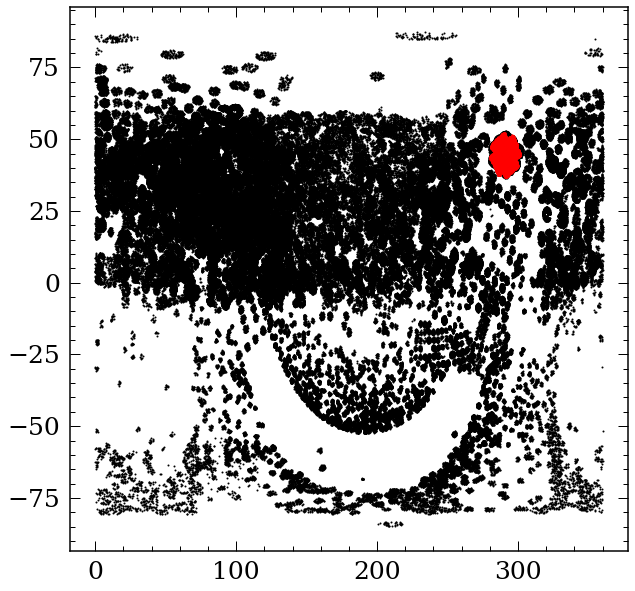

In [18]:

plt.scatter(allages['ra'],allages['dec'],s=1,c='k')
plt.scatter(astroages_position['ra'],astroages_position['dec'],s=2,c='r')
#plt.xlim([15,25])
#plt.ylim([20,60])



In [19]:

cmastro['astroage']=np.power(10,cmastro['LogAge'])/1000


<ipython-input-19-30f09b68ec17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmastro['astroage']=np.power(10,cmastro['LogAge'])/1000


(0.0, 15.0)

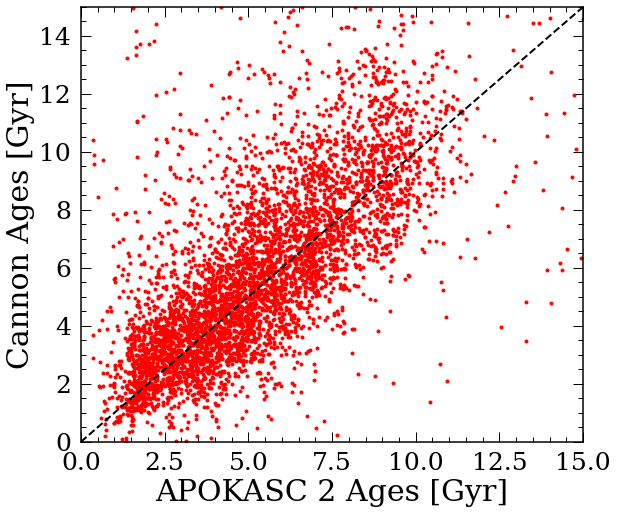

In [20]:
plt.figure(figsize=(9,8))
plt.plot(cmastro['astroage'],cmastro['age'],'r.')
plt.plot([0,15],[0,15],'k--')
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([0,15])


# color by C/N

In [21]:
allapogee=pd.read_pickle('../SecondYear/CannonDR16.pkl')
allapogee['C_N']=allapogee['C_FE']-allapogee['N_FE']
allapogee=pd.merge(allapogee[['ID','C_N','O_FE','K_FE','CU_FE','M_H']],cmastro[['2MASS','astroage','age']],left_on='ID',right_on='2MASS',how='inner')



/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


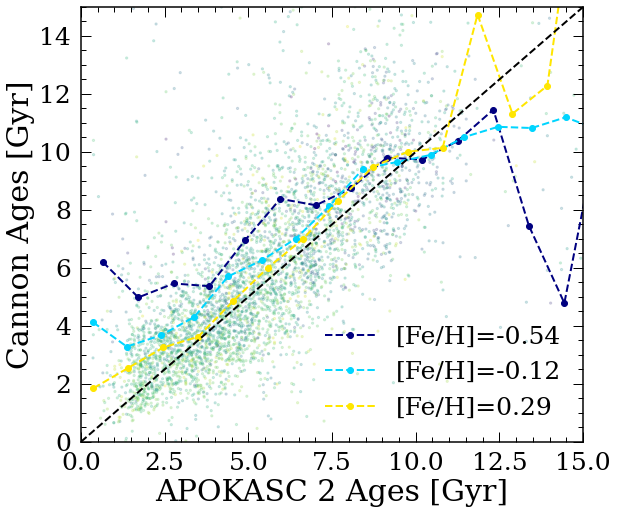

In [108]:
import matplotlib
def rolwindow(age,cn,window=1,avfunc=np.mean):
    age,cn=zip(*sorted(zip(age,cn)))
    minage=min(age)
    maxage=max(age)
    counts=int(np.ceil((maxage-minage)/window))
    
    agebins=np.linspace(minage,maxage,counts+1)
    aveage=np.linspace(minage,maxage,counts)
    cns=np.zeros(counts)
    
    for i in range(counts):
        m=(age>agebins[i])&(age<agebins[i+1])
        cn=np.array(cn)
        cns[i]=avfunc(cn[m])
    return aveage, cns

feagebin=np.linspace(-0.75,0.5,4)

plt.figure(figsize=(9,8))
for i in range(len(feagebin)-1):
    m=(allapogee['M_H']>feagebin[i])&(allapogee['M_H']<feagebin[i+1])
    allapogee_sing=allapogee[m].sort_values(by='age')
    avage,cns=rolwindow(allapogee_sing['astroage'],allapogee_sing['age'])
    plt.plot(avage,cns,'--o',color=colors_p[i],label='[Fe/H]=%.2f'%((feagebin[i+1]+feagebin[i])/2))
    
plt.scatter(allapogee['astroage'],allapogee['age'],c=allapogee['M_H'],alpha=0.2,s=5)
plt.plot([0,15],[0,15],'k--')
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([0,15])
plt.legend()


/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in doubl

(-0.8, 0.5)

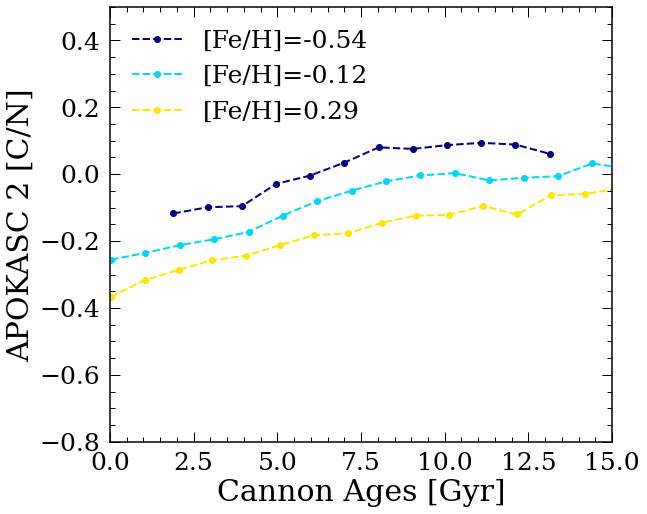

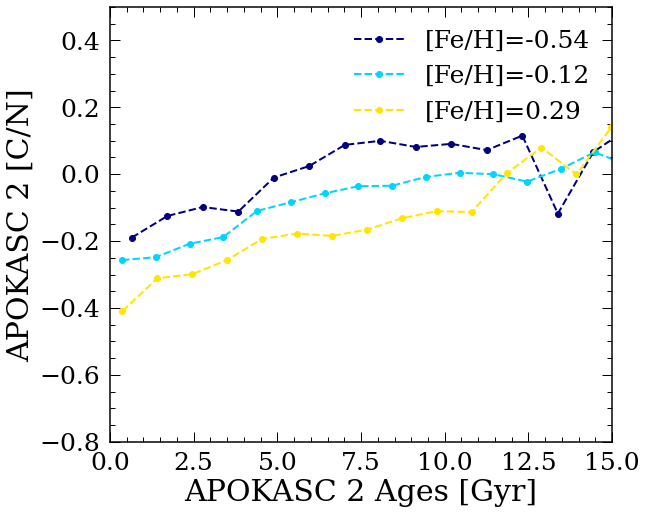

In [109]:

feagebin=np.linspace(-0.75,0.5,4)


cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=min(feagebin), vmax=max(feagebin))
colors_p=[cmap(norm(i)) for i in feagebin]


plt.figure(figsize=(9,8))
for i in range(len(feagebin)-1):
    m=(allapogee['M_H']>feagebin[i])&(allapogee['M_H']<feagebin[i+1])
    allapogee_sing=allapogee[m].sort_values(by='age')
    avage,cns=rolwindow(allapogee_sing['age'],allapogee_sing['C_N'])
    plt.plot(avage,cns,'--o',color=colors_p[i],label='[Fe/H]=%.2f'%((feagebin[i+1]+feagebin[i])/2))

plt.ylabel('APOKASC 2 [C/N]')
plt.xlabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([-0.8,0.5])
plt.legend()



plt.figure(figsize=(9,8))
for i in range(len(feagebin)-1):
    m=(allapogee['M_H']>feagebin[i])&(allapogee['M_H']<feagebin[i+1])
    allapogee_sing=allapogee[m].sort_values(by='age')
    avage,cns=rolwindow(allapogee_sing['astroage'],allapogee_sing['C_N'])
    plt.plot(avage,cns,'--o',color=colors_p[i],label='[Fe/H]=%.2f'%((feagebin[i+1]+feagebin[i])/2))
plt.legend()    
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('APOKASC 2 [C/N]')
plt.xlim([0,15])
plt.ylim([-0.8,0.5])

(-0.2, 0.5)

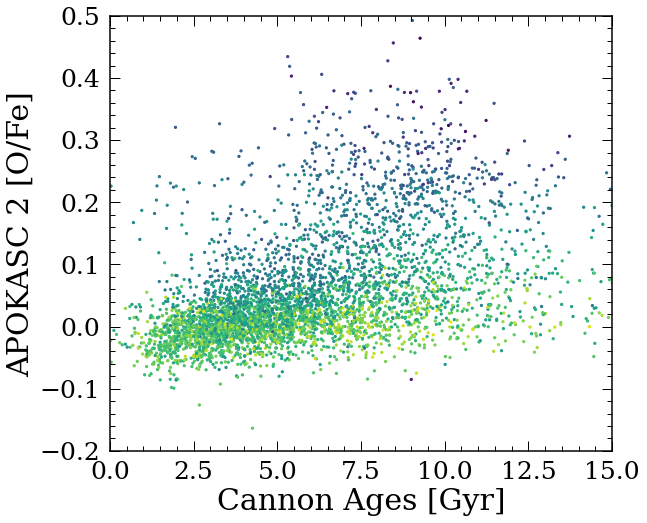

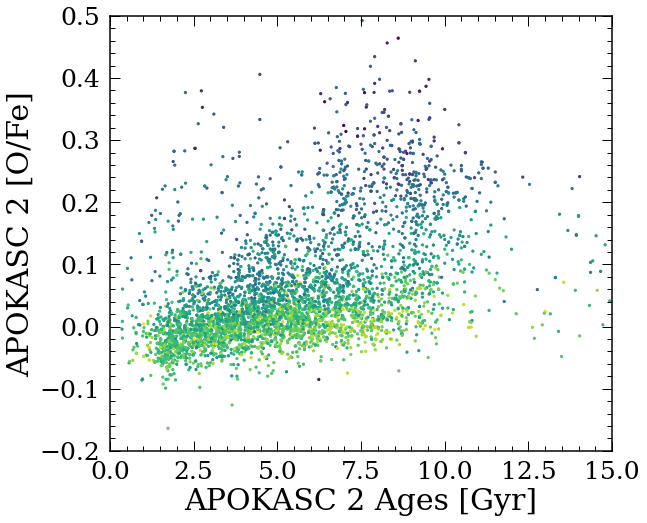

In [24]:

plt.figure(figsize=(9,8))
plt.scatter(allapogee['age'],allapogee['O_FE'],s=5,c=allapogee['M_H'])
#plt.plot([0,15],[0,15],'k--')
plt.ylabel('APOKASC 2 [O/Fe]')
plt.xlabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([-0.2,0.5])


plt.figure(figsize=(9,8))
plt.scatter(allapogee['astroage'],allapogee['O_FE'],s=5,c=allapogee['M_H'])
#plt.plot([0,15],[0,15],'k--')
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('APOKASC 2 [O/Fe]')
plt.xlim([0,15])
plt.ylim([-0.2,0.5])

(-0.2, 0.5)

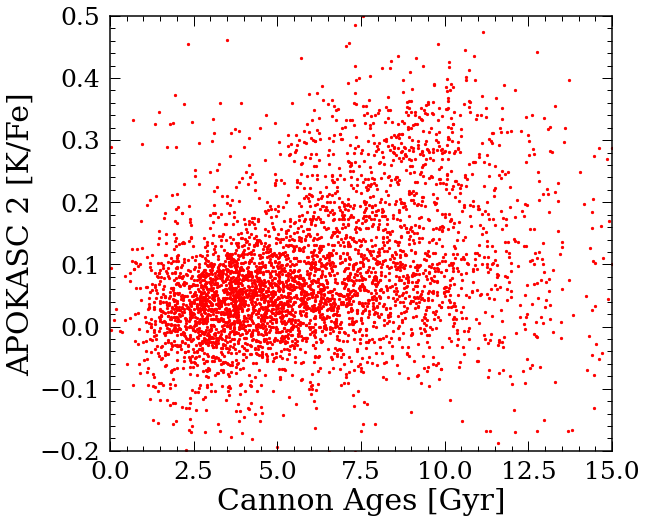

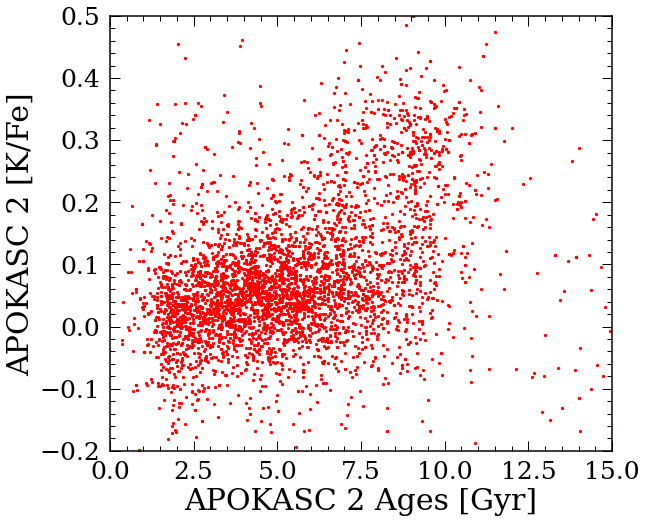

In [49]:

plt.figure(figsize=(9,8))
plt.scatter(allapogee['age'],allapogee['K_FE'],s=5,c='r')
#plt.plot([0,15],[0,15],'k--')
plt.ylabel('APOKASC 2 [K/Fe]')
plt.xlabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([-0.2,0.5])


plt.figure(figsize=(9,8))
plt.scatter(allapogee['astroage'],allapogee['K_FE'],s=5,c='r')
#plt.plot([0,15],[0,15],'k--')
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('APOKASC 2 [K/Fe]')
plt.xlim([0,15])
plt.ylim([-0.2,0.5])

(-0.8, 0.5)

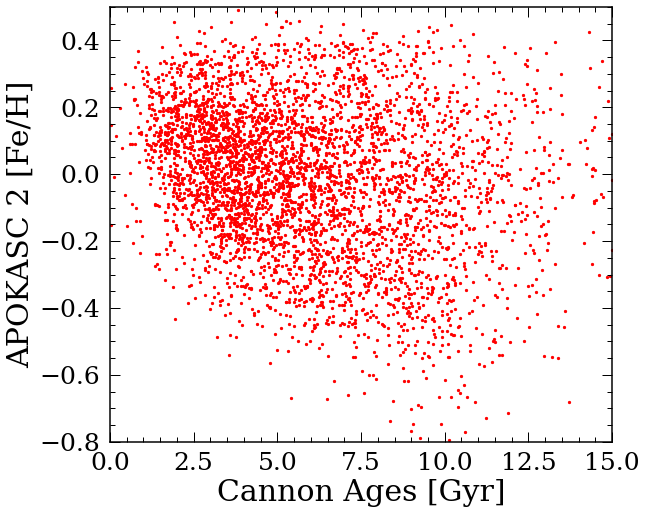

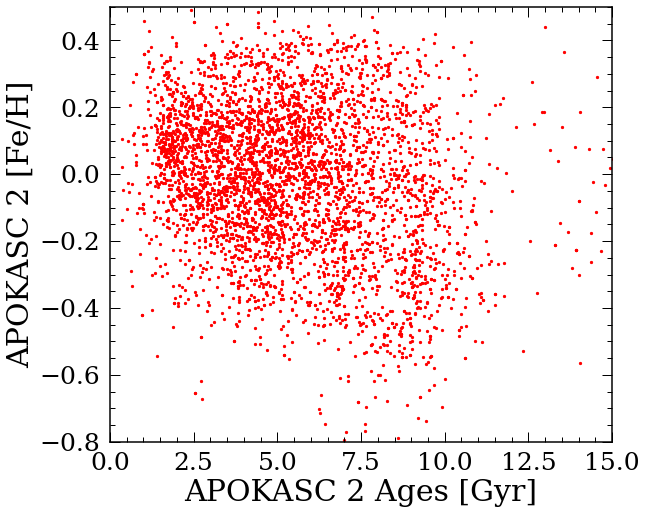

In [52]:

plt.figure(figsize=(9,8))
plt.scatter(allapogee['age'],allapogee['M_H'],s=5,c='r')
#plt.plot([0,15],[0,15],'k--')
plt.ylabel('APOKASC 2 [Fe/H]')
plt.xlabel('Cannon Ages [Gyr]')
plt.xlim([0,15])
plt.ylim([-0.8,0.5])


plt.figure(figsize=(9,8))
plt.scatter(allapogee['astroage'],allapogee['M_H'],s=5,c='r')
#plt.plot([0,15],[0,15],'k--')
plt.xlabel('APOKASC 2 Ages [Gyr]')
plt.ylabel('APOKASC 2 [Fe/H]')
plt.xlim([0,15])
plt.ylim([-0.8,0.5])